# Notebook to compute the the Signal Selection algorithms

This notebook implements the supervised and unsupervied signal selection approches. Each approach can run separately without following any specific order.

## Supervised Approches 

### Random Forest Automated [1]

Input: 
- <selected/All.pkl> the list of signals after the Apriori selection
- <dataset/All.pkl> the dataset for the Supervised Signal Selection

Output: 
- <selected/RF.pkl> the best subset of signals

### RFE-RF [2]
Input: 
- <selected/All.pkl> the list of signals after the Apriori selection
- <dataset/All.pkl> the dataset for the Supervised Signal Selection

Output: 
- <selected/RFERF.pkl> the best subset of signals

### RFE-SVM [3]
NB: At least 10 cycles are needed as it computes the 10-Fold Cross Validation!
Input: 
- <selected/All.pkl> the list of signals after the Apriori selection
- <dataset/All.pkl> the dataset for the Supervised Signal Selection

Output: 
- <selected/RFESVM.pkl> the best subset of signals

## Unsupervised Approches

### PFA [4]

Input: 
- <selected/All.pkl> the list of signals after the Apriori selection
- <cycle_order.csv> the file with the list of cycles and their lables

Output: different based on the optimized clustering metix 
- <selected/PFASilhouette.pkl> the best subset of signals
- <selected/PFASSE.pkl> the best subset of signals

### CORR-FS [5]

Input: 
- <selected/All.pkl> the list of signals after the Apriori selection
- <cycle_order.csv> the file with the list of cycles and their lables

Output: different based on the optimized clustering metix 
- <selected/PFASilhouette.pkl> the best subset of signals
- <selected/PFASSE.pkl> the best subset of signals


###### [1]  Robin Genuer, Jean-Michel Poggi, Christine Tuleau. Random Forests: some methodological insights. [Research Report] RR-6729, INRIA. 2008. ffinria-00340725f
###### [2] Diaz-Uriarte, Ramon, and Sara Alvarez de Andrés. "Variable selection from random forests: application to gene expression data." arXiv preprint q-bio/0503025 (2005).
###### [3] Rakotomamonjy, Alain. "Variable selection using SVM-based criteria." Journal of machine learning research 3.Mar (2003): 1357-1370.
###### [4] Lu, Yijuan, et al. "Feature selection using principal feature analysis." Proceedings of the 15th ACM international conference on Multimedia. ACM, 2007.
###### [5] Giobergia, Flavio, et al. "Mining Sensor Data for Predictive Maintenance in the Automotive Industry." 2018 IEEE 5th International Conference on Data Science and Advanced Analytics (DSAA). IEEE, 2018.

In [1]:
from sklearn import decomposition, preprocessing
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import pathlib
import pickle
import sys

%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

ParentPath = str(pathlib.Path().absolute().parent)
sys.path.insert(1, ParentPath+'/1-SignalSelection/functions')
sys.path.insert(1, ParentPath+'/classes/public')


import signalSelectionRF as RF
import signalSelectionRFPercent as RFPerc
import signalSelectionSVMBased as SigSelSVM
from findKnee import findKnee
from signalsToFeatures import signalsToFeatures
from PFA import PFA

# Signal Selection

## Supervised

### RF

RF - Over
Plot final variables' importance...


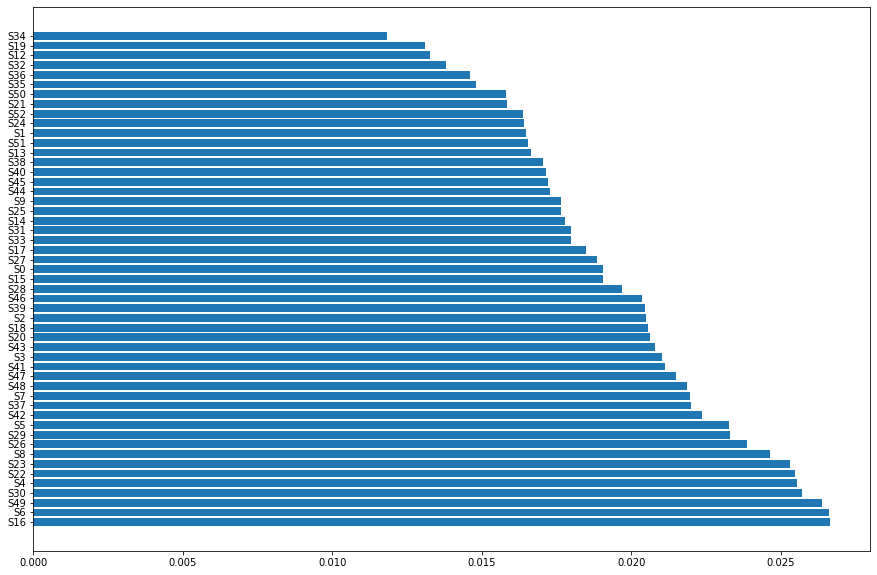

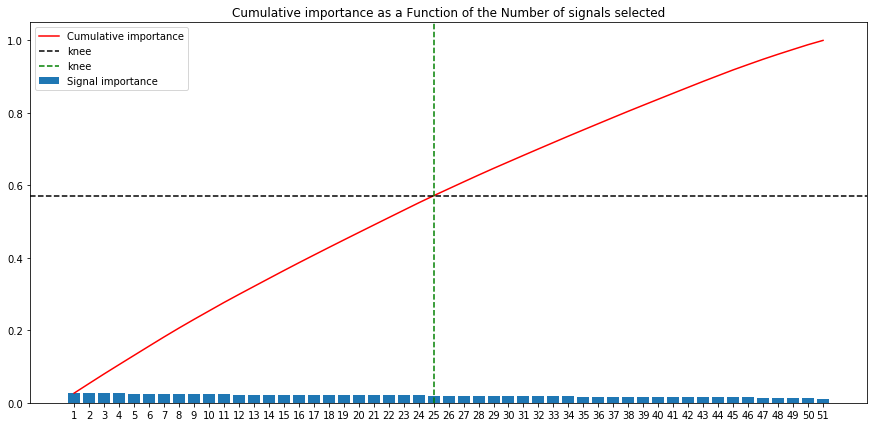

Knee:  25
RF 25


In [2]:
#Dataset is the pandas dataframe where each row describe: the cycle ID, the features, the label 
Dataset = pickle.load(open("dataset/All.pkl","rb"))
#signalSelected is a vector containing the list of signals avaiable. Dataset features are extracted from these signals
signalSelected = pickle.load(open("selected/All.pkl","rb"))

# RF: Implements the RF algorithm

#Paramters: 
# Dataset: the original dataset composed by all cycles, features and label
# signalSelected: the original set of signals after the apriori signal selection

# Returns
# signalsSelected: The best subset of signals
selector = RF.signalSelectionRF(Dataset,signalSelected)
signalsSelected = selector.select()
print("RF",len(signalsSelected))
pickle.dump(signalsSelected,open("selected/RF.pkl","wb"))

### RFERF Percent

Plot final signals' importance...


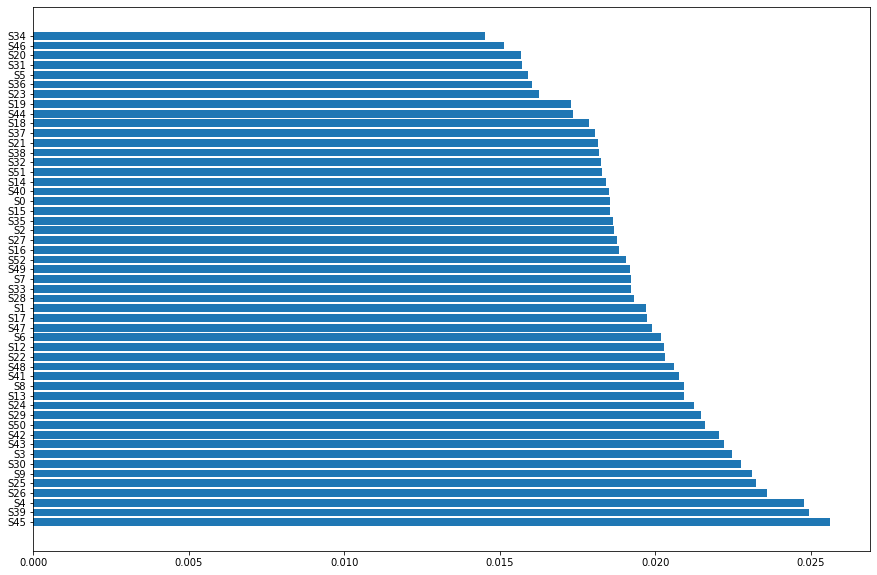

OOB ERROR: 0.5541237113402062
Plot final signals' importance...


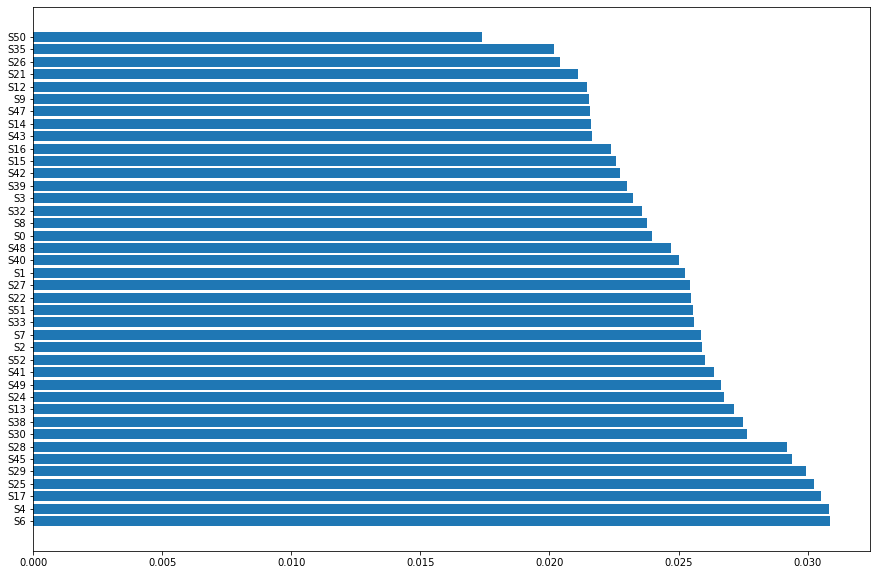

OOB ERROR: 0.5541237113402062
Plot final signals' importance...


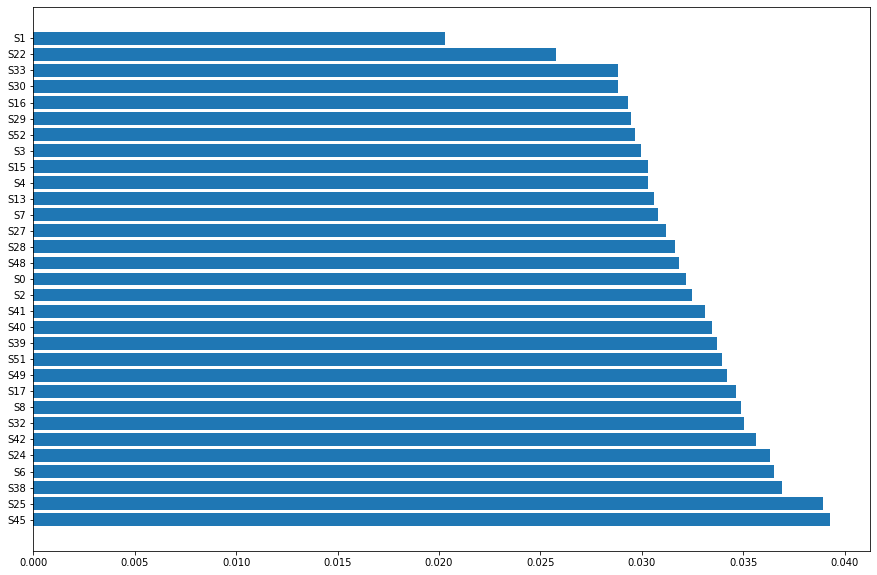

OOB ERROR: 0.5541237113402062
Plot final signals' importance...


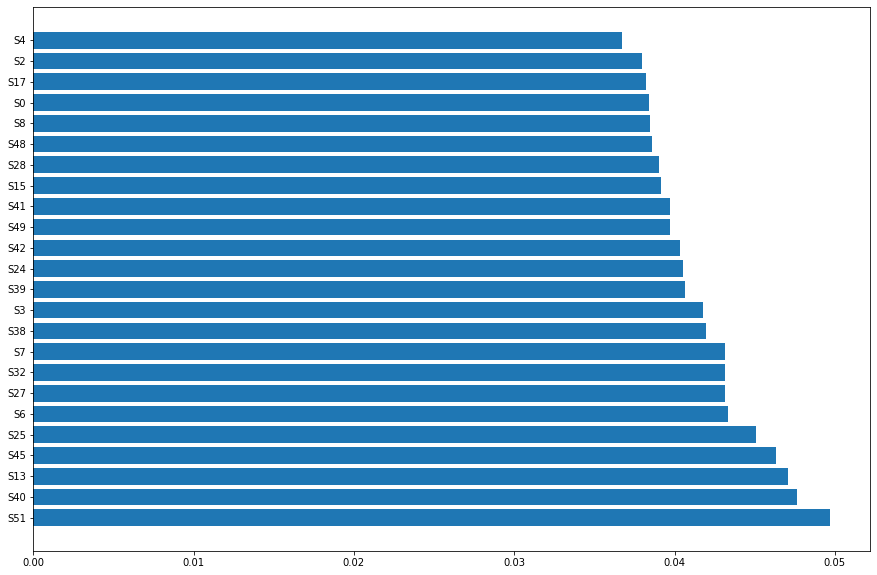

OOB ERROR: 0.5541237113402062
Plot final signals' importance...


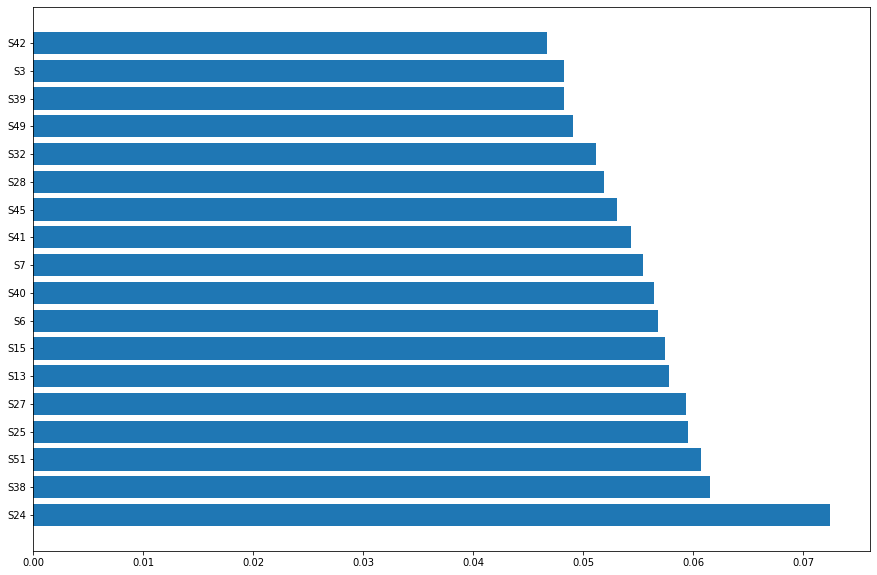

OOB ERROR: 0.5541237113402062
Plot final signals' importance...


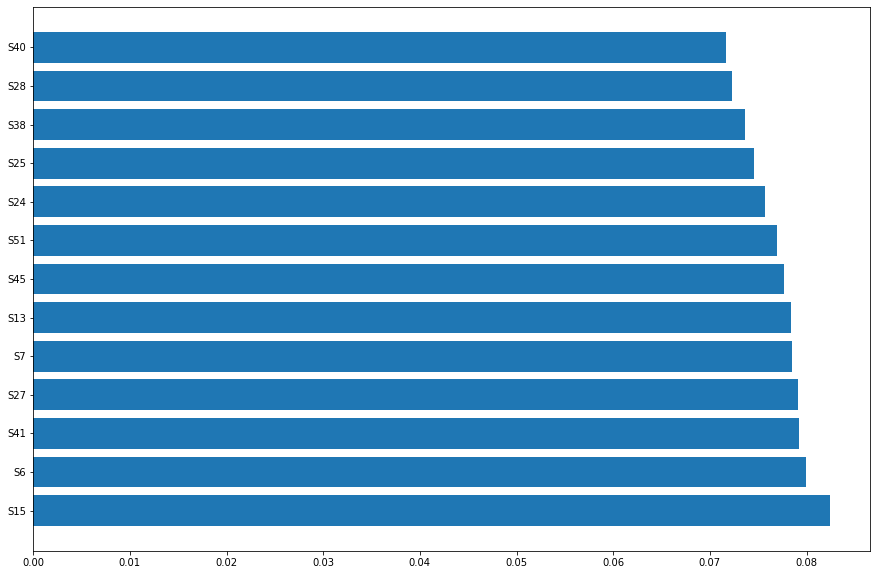

OOB ERROR: 0.5541237113402062
Plot final signals' importance...


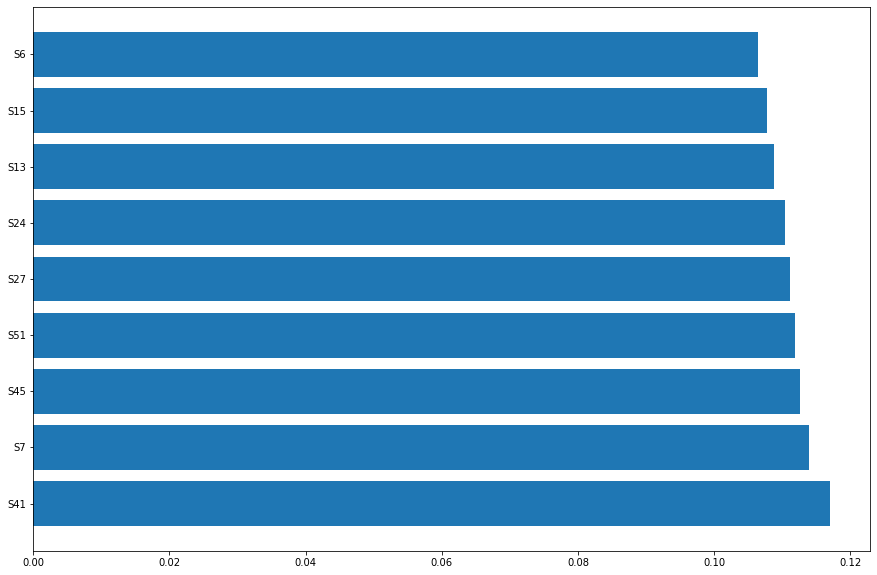

OOB ERROR: 0.5541237113402062
Plot final signals' importance...


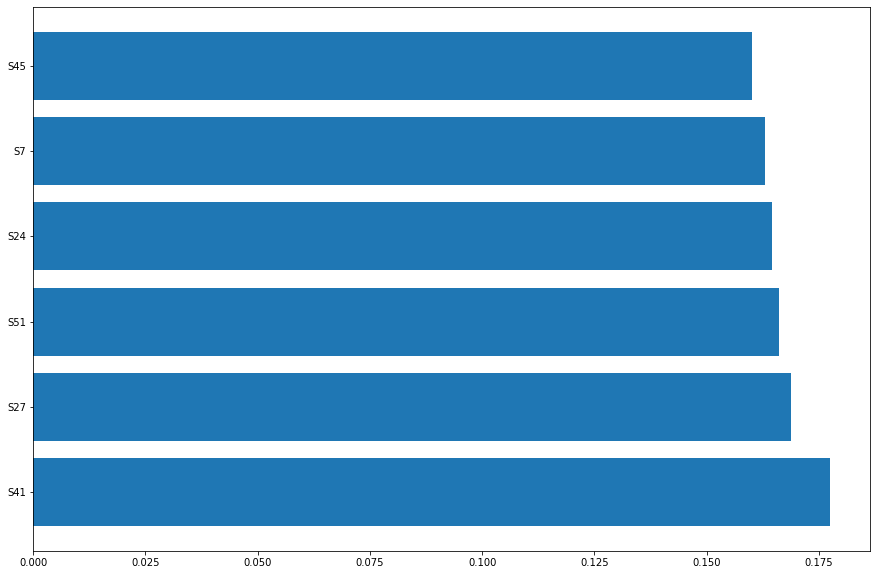

OOB ERROR: 0.5541237113402062
Plot final signals' importance...


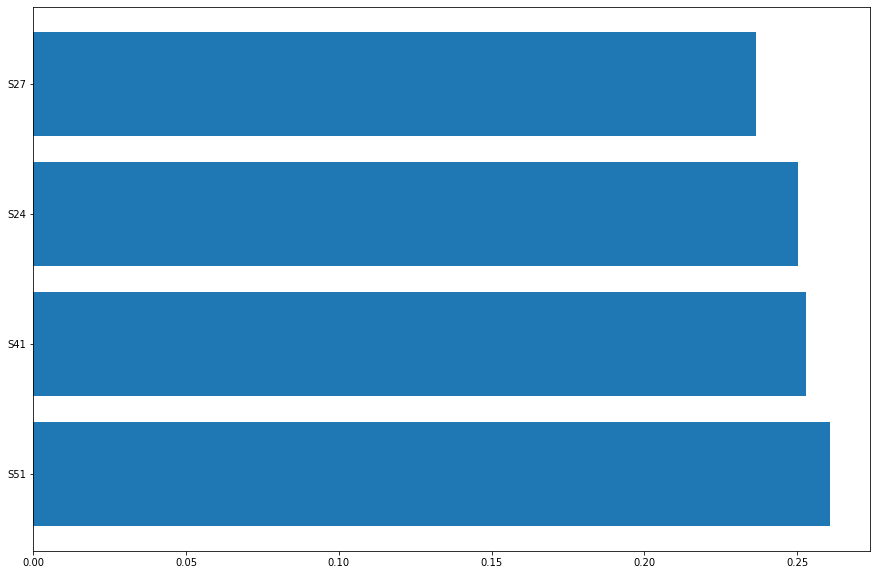

OOB ERROR: 0.5541237113402062
Plot final signals' importance...


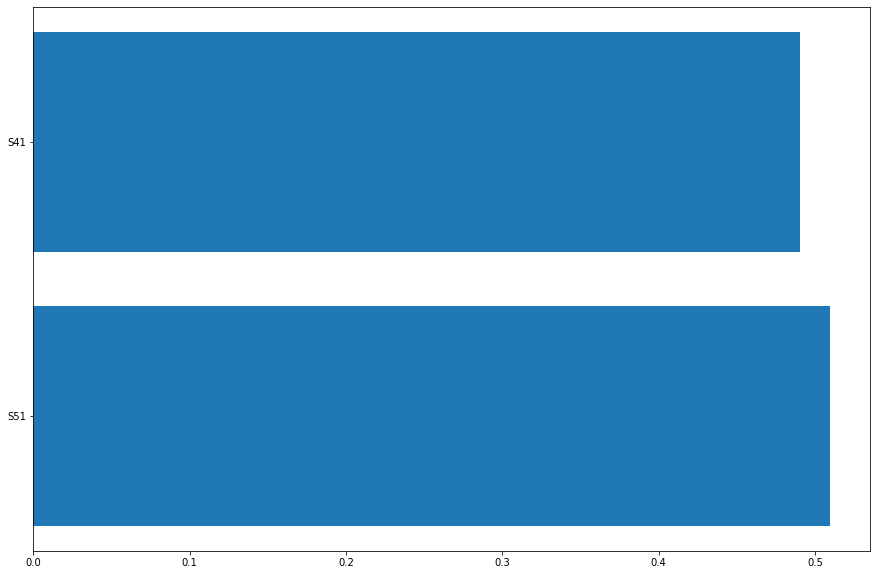

OOB ERROR: 0.5541237113402062
Plot final signals' importance...


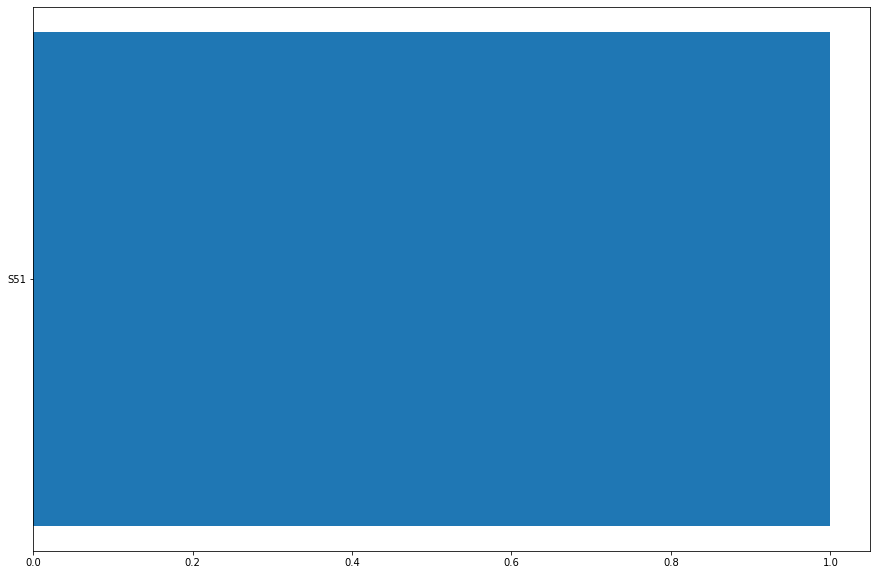

OOB ERROR: 0.5541237113402062


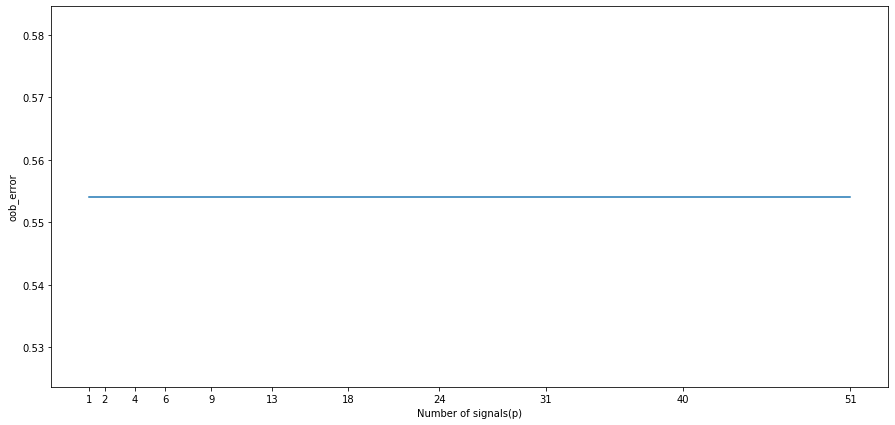

In [3]:
#Dataset is the pandas dataframe where each row describe: the cycle ID, the features, the label 
Dataset = pickle.load(open("dataset/All.pkl","rb"))
#signalSelected is a vector containing the list of signals avaiable. Dataset features are extracted from these signals
signalSelected = pickle.load(open("selected/All.pkl","rb"))

# SignalSelectionRFPercent: Implements the RFE-RF algorithm

#Paramters: 
# Dataset: the original dataset composed by all cycles, features and label
# signalSelected: the original set of signals after the apriori signal selection
# percToDrop: the fraction of signals to discard at each iteration

# Returns
# signalsSelected: The best subset of signals
# oob_errors: The list of oob-error during the training phase 
selector = RFPerc.SignalSelectionRFPercent(signalSelected, Dataset, percToDrop = 0.2)
signalsSelected,oob_errors, sizes = selector.select()

plt.figure(figsize=(15, 7))
plt.plot(sizes,oob_errors)
plt.xlabel("Number of signals(p)")
plt.xticks(sizes)
plt.ylabel("oob_error")
plt.show()

pickle.dump(signalsSelected,open("selected/RFERF.pkl","wb")) 

### RFE-SVM

In [4]:
#Dataset is the pandas dataframe where each row describe: the cycle ID, the features, the label 
Dataset = pickle.load(open("dataset/All.pkl","rb"))
#signalSelected is a vector containing the list of signals avaiable. Dataset features are extracted from these signals
signalSelected = pickle.load(open("selected/All.pkl","rb"))


# SignalSelectionSVMBased: Implements the RFE-SVM algorithm

#Paramters: 
# Dataset: the original dataset composed by all cycles, features and label
# signalSelected: the original set of signals after the apriori signal selection
# percToDrop: the fraction of signals to discard at each iteration

# Returns
# signalsSelected: The best subset of signals
# f1scores: The list of F1-Scores of the red class
selector = SigSelSVM.SignalSelectionSVMBased(Dataset,signalSelected, percToDrop = 0.2)
signalsSelected,f1scores = selector.select()
pickle.dump(signalsSelected,open("selected/RFESVM.pkl","wb"))

Start Selection


## Unupervised

### PFA

In [ ]:
#cycles is an array where each element contains the filename of a cycle. Cycles in the array are sorted based on acquisition time 
#signalSelected is a vector containing the list of signals avaiable. Dataset features are extracted from these signals
signalSelected = pickle.load(open("selected/All.pkl","rb"))
#path of the cycles



#path of the cycles
fpath = ParentPath+'/data/'

#cycles is an array where each element contains the filename of a cycle. Cycles in the array are sorted based on acquisition time 
file_label = pd.read_csv(fpath+'cycle_order.csv', sep=",")



#Concatenation of all cycles into a single dataframe
df_total = pd.DataFrame();
Y = []
for index,row in file_label.iterrows():
    file = row['cycleName']
    df = pd.read_csv(fpath + file+".csv",  encoding ='latin1', usecols=signalSelected) 
    frames = [df_total, df]
    df_total = pd.concat(frames)

#Z-Score normalization
X_scaled = preprocessing.scale(df_total)
df_total.shape

#### q optimization (number of componenents to be used for the PFA)
Choose according to the knee point of the curve

In [ ]:
cumsum = np.zeros(len(signalSelected))

pca = decomposition.PCA().fit(X_scaled)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
cumsum = np.insert(arr=cumsum,obj=0,values=[0])
d = [n for n in range(0,len(cumsum))]
cumsum

In [ ]:
#Identification of the knee-point and visualization
#Indentification of the best q parameter

kneeIndex, kneeValue = findKnee(cumsum)

bars = pca.explained_variance_ratio_*100
bars = np.insert(arr=bars,obj=0,values=[0])

plt.figure(figsize=(15, 7))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components considerating all cycles')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = kneeValue, color='k', linestyle='--', label = '95% Explained Variance')
plt.bar(x=range(0,len(signalSelected)+1),height=bars)
plt.xticks(range(1,len(pca.explained_variance_ratio_)+1))
plt.axvline(x = kneeIndex-1, color='g', linestyle='--', label = 'Explained Variance selected')
plt.legend(loc='best')
plt.show()

In [ ]:
#Run the PFA algorithm with different values of k for the k-means clustering.

# PFA: Implements the PFA algorithm

#Paramters: 
# n_signals: the number of signals to be selected
# q: the value of q selected from the previous optimization

# Returns
# column_indices: the index of the selected signals
# pfa.error_: the SSE error value

errors = []
BestSignals = []
for i in range(1,len(signalSelected)+1):
    pfa = PFA(n_signals=i, q=6)
    pfa.fit(df_total.values)
    # To get the transformed matrix
    x = pfa.features_
    # To get the column indices of the kept features
    column_indices = pfa.indices_
    Current = [signalSelected[k] for k in column_indices]
    BestSignals.append(Current)
    errors.append(pfa.error_)

In [ ]:
#Identification of the knee-point and visualization
#Indentification of the best number of clusters according to the SSE
#Selection of the best subset of signals

kneeIndex, kneeValue = findKnee(errors)

plt.figure(figsize=(15, 7))
plt.plot(range(1,len(signalSelected)+1),errors, color = 'red',label='SSE')
plt.xticks(range(1,len(errors)+1))
plt.ylabel('SSE')
plt.xlabel('Number of signals (p)')
plt.axhline(y = kneeValue, color='k', linestyle='--', label = 'p value')
plt.axvline(x = kneeIndex, color='g', linestyle='--', label = 'Elbow value')
plt.legend(loc='best')
plt.show()
pickle.dump(BestSignals[kneeIndex-1],open("selected/PFASSE.pkl","wb"))

In [ ]:
#Run the PFA algorithm with different values of k for the k-means clustering.
#And Selection of the best subset of signals


# PFA: Implements the PFA algorithm

#Paramters: 
# n_signals: the number of signals to be selected
# q: the value of q selected from the previous optimization

# Returns
# column_indices: the index of the selected signals
# pfa.pfa.A_q, pfa.clusters: the clustering result to compute the Silhouette score 


scores = []
BestSignals = []
MaxIndex = -1
MaxValue = -2
for n_clusters in range(2,len(signalSelected)-1):
    pfa = PFA(n_signals=n_clusters, q=6)
    pfa.fit(df_total.values)
    # To get the transformed matrix
    x = pfa.features_
    # To get the column indices of the kept features
    column_indices = pfa.indices_
    Current = [signalSelected[k] for k in column_indices]
    BestSignals.append(Current)

    score = silhouette_score (pfa.A_q, pfa.clusters)
    if(score>MaxValue): 
        MaxValue = score
        MaxIndex = n_clusters
    scores.append(score)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
pickle.dump(BestSignals[MaxIndex-2],open("selected/PFASilhouette.pkl","wb"))

In [ ]:
#Visualization of the Silhouette score
#Indentification of the best number of clusters according to the Silhouette score

plt.figure(figsize=(15, 7))

plt.axhline(y = MaxValue, color='k', linestyle='--', label = 'p value')
plt.axvline(x = MaxIndex, color='g', linestyle='--', label = 'Elbow value')

plt.plot([i for i in range(2,len(signalSelected)-1)],scores)
plt.xlabel("Number of signals(p)")
plt.xticks(range(1,len(errors)+1))
plt.grid()
plt.ylabel("Shiluette")
plt.show()

### CORR-FS

In [ ]:
def ComputeCorrelationMatrix(signalSelected,fpath,file_label):

    couples = {}

    for si in signalSelected:
        couples[si] = {}
        for sj in signalSelected:
            if(si!=sj):
                if(sj not in couples[si]): 
                    couples[si][sj] = []

    for index, row in file_label.iterrows():
        file = row['cycleName']
        df_cameo = pd.read_csv(fpath + file+".csv",  encoding ='latin1', usecols=signalSelected) 
        a = df_cameo.corr()
        for si in signalSelected:
            for sj in signalSelected:
                if(si!=sj):
                    couples[si][sj].append(a.loc[si,sj])  

    fout = open("correlations.csv","w")
    f = ""
    for i in range(388):  f+="c_%d,"%i 
    f = f[0:-1]
    fout.write("s1,s2,%s,mean\n"%f)

    for si in signalSelected:
        for sj in signalSelected:
            if(si!=sj):
                st = "%s,%s,"%(si,sj)
                for v in couples[si][sj]: st +="%.4f,"%v
                st+="%.8f"%np.mean(couples[si][sj])+"\n"

                fout.write(st)
    fout.close()
    
    return

In [ ]:
def RunCorrelationAlgorithm(rmin_minvalue=10,rmmin_maxvalue=100,rmin_step=5):

    rmin_bests = {}

    for rmin_int in range(rmin_minvalue,rmmin_maxvalue+1,rmin_step):

        CorrelationMatrix = pd.read_csv("correlations.csv")
        CorrelationMatrix = CorrelationMatrix.dropna()
    
        L = set(CorrelationMatrix['s1'])
        rmin = float(rmin_int)/100

        groups = []
        bests = []

        while(len(L) > 0):
            maxs = -1
            b = ""
            S = {}
            for i in L:
                rvalues = CorrelationMatrix[CorrelationMatrix['s1']==i]["mean"]
                si = 0
                for ri in rvalues:
                    si += ri*ri
                S[i]=si
                if(si>maxs): 
                    maxs=si
                    b=i

            wellrep_couples = CorrelationMatrix[(CorrelationMatrix['s1']==b) & (CorrelationMatrix["mean"]>rmin)]
            wellrep = list(wellrep_couples['s2'])

            bests.append(b)
            groups.append((b,wellrep))
            L.remove(b)  
            for wellrepi in wellrep:
                if(wellrepi in L):
                    L.remove(wellrepi)
        rmin_bests[str(rmin)]=bests
        
            
    return rmin_bests

In [ ]:
#Run the CORR-FS algorithm with different values of rmin.


#signalSelected is a vector containing the list of signals avaiable. Dataset features are extracted from these signals
signalSelected = pickle.load(open("selected/All.pkl","rb"))

#cycles is an array where each element contains the filename of a cycle. Cycles in the array are sorted based on acquisition time 
file_label = pd.read_csv(fpath+'cycle_order.csv', sep=",")


# ComputeCorrelationMatrix: Compute the correlation between each pair of signals in all the cycles and the resulting average correlation
#Paramters: 
# signalSelected: the original set of signals after the apriori signal selection
# fpath: path of the cycles data
#cycles: an array where each element contains the filename of a cycle. Cycles in the array are sorted based on acquisition time 

#save a file called correlation.csv where each row has a pair of signals, the correlation in each cycle, and the average correlation
ComputeCorrelationMatrix(signalSelected,fpath,file_label)   

#RunCorrelationAlgorithm: Runs the CORR-FS algorithm
#Paramters: 
# rmin_minvalue: the minimum value of the rmin threshold 
# rmmin_maxvalue: the maximum value of the rmin threshold 
#rmin_step: the step between the rmin threshold 
# Returns
# rmin_bests: a dictionary containing, for each value of rmin the list of represetative signals

rmin_bests = RunCorrelationAlgorithm(rmin_minvalue=10,rmmin_maxvalue=100,rmin_step=5)

In [ ]:
#Visualization of the rmin trend
#Indentification of the best number of rmin according to the knee-point identification
#Save the best subset of signals

rmins = list(rmin_bests.keys())

ng = [len(rmin_bests[rmin]) for rmin in rmins]

kneeIndex, kneeValue = findKnee(ng)
plt.plot(rmins,ng)
plt.axhline(y = kneeValue, color='k', linestyle='--', label = 'p value')
plt.axvline(x = kneeIndex-1, color='g', linestyle='--', label = 'Elbow value')
plt.grid()
plt.ylabel("N groups")
plt.xlabel("r_min")
plt.show()
plt.close()
pickle.dump(rmin_bests[str(rmins[kneeIndex-1])],open("selected/CORR-FS.pkl","wb"))